In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras import models
from keras import layers

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam, SGD
from keras import regularizers


Using TensorFlow backend.


In [13]:
testdf=pd.read_csv('sign_mnist_test.csv')
traindf=pd.read_csv('sign_mnist_train.csv')

In [14]:
traindf.shape, traindf.head()

((27455, 785),
    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0      3     107     118     127     134     139     143     146     150   
 1      6     155     157     156     156     156     157     156     158   
 2      2     187     188     188     187     187     186     187     188   
 3      2     211     211     212     212     211     210     211     210   
 4     13     164     167     170     172     176     179     180     184   
 
    pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
 0     153  ...       207       207       207       207       206       206   
 1     158  ...        69       149       128        87        94       163   
 2     187  ...       202       201       200       199       198       199   
 3     210  ...       235       234       233       231       230       226   
 4     185  ...        92       105       105       108       133       163   
 
    pixel781  pixel782  pixel783  pixel784  


In [15]:
testdf.shape, testdf.head()

((7172, 785),
    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0      6     149     149     150     150     150     151     151     150   
 1      5     126     128     131     132     133     134     135     135   
 2     10      85      88      92      96     105     123     135     143   
 3      0     203     205     207     206     207     209     210     209   
 4      3     188     191     193     195     199     201     202     203   
 
    pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
 0     151  ...       138       148       127        89        82        96   
 1     136  ...        47       104       194       183       186       184   
 2     147  ...        68       166       242       227       230       227   
 3     210  ...       154       248       247       248       253       236   
 4     203  ...        26        40        64        48        29        46   
 
    pixel781  pixel782  pixel783  pixel784  
 

In [16]:
labelstr = traindf['label']
traindf.drop(columns =['label'], inplace = True)
traindf.shape, labelstr.head()

((27455, 784), 0     3
 1     6
 2     2
 3     2
 4    13
 Name: label, dtype: int64)

In [17]:
labelstt = testdf['label']
testdf.drop(columns =['label'], inplace = True)
testdf.shape, labelstt.head()

((7172, 784), 0     6
 1     5
 2    10
 3     0
 4     3
 Name: label, dtype: int64)

In [18]:
# no 9(J) or 25(Z)
labelstr.value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [19]:
imagestest = testdf.values
imagestest = np.array([np.reshape(i, (28, 28)) for i in imagestest])
imagestest = np.array([i.flatten() for i in imagestest])
imagestest = imagestest/255

In [20]:
images = traindf.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])
images = images/255

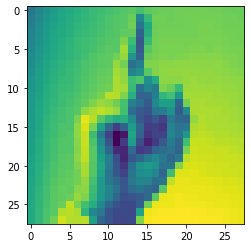

In [21]:
plt.imshow(images[0].reshape(28,28))

In [22]:
labelstr[0]

3

In [23]:
image_train, image_val, label_train, label_val = train_test_split(images, labelstr, random_state=23, train_size=.8)

In [24]:
num_classes = 25
label_train = keras.utils.to_categorical(label_train, num_classes)
label_val = keras.utils.to_categorical(label_val, num_classes)
labelstt = keras.utils.to_categorical(labelstt, num_classes)

In [25]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

#  MLP

## Relu

In [26]:
model = models.Sequential()
model.add(layers.Dense(30, activation='relu', input_shape=(784,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(25, activation='sigmoid'))

In [27]:
model.compile(optimizer ='sgd' ,loss='categorical_crossentropy',metrics=['accuracy'])

histoire = model.fit(image_train,
                    label_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(image_val, label_val))

Train on 21964 samples, validate on 5491 samples
Epoch 1/20
21964/21964 [==============================] - 1s 58us/step - loss: 3.2060 - accuracy: 0.0397 - val_loss: 3.1935 - val_accuracy: 0.0459
Epoch 2/20
21964/21964 [==============================] - 1s 51us/step - loss: 3.1807 - accuracy: 0.0454 - val_loss: 3.1583 - val_accuracy: 0.0479
Epoch 3/20
21964/21964 [==============================] - 1s 51us/step - loss: 3.1348 - accuracy: 0.0409 - val_loss: 3.0968 - val_accuracy: 0.0504
Epoch 4/20
21964/21964 [==============================] - 1s 52us/step - loss: 3.0667 - accuracy: 0.0535 - val_loss: 3.0824 - val_accuracy: 0.1131
Epoch 5/20
21964/21964 [==============================] - 1s 50us/step - loss: 2.9912 - accuracy: 0.0690 - val_loss: 2.9511 - val_accuracy: 0.0765
Epoch 6/20
21964/21964 [==============================] - 1s 52us/step - loss: 2.8835 - accuracy: 0.0841 - val_loss: 2.7991 - val_accuracy: 0.1069
Epoch 7/20
21964/21964 [==============================] - 1s 51us/ste

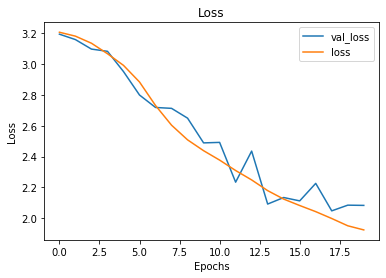

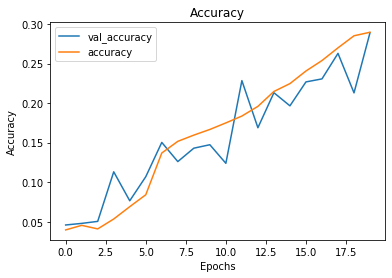

In [28]:
visualize_training_results(histoire)

In [29]:
results_test1 = model.evaluate(imagestest, labelstt)

7172/7172 [==============================] - 0s 24us/step


In [30]:
results_test1

[2.3111519109451497, 0.2339654266834259]

## Softmax

In [31]:
model2 = models.Sequential()
model2.add(layers.Dense(80, activation='relu', input_shape=(784,)))
model2.add(layers.Dense(40, activation='relu'))
model2.add(layers.Dense(20, activation='relu'))
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(25, activation='softmax'))

In [32]:
model2.compile(optimizer ='sgd' ,loss='categorical_crossentropy',metrics=['accuracy'])

history = model2.fit(image_train,
                    label_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(image_val, label_val))

Train on 21964 samples, validate on 5491 samples
Epoch 1/20
21964/21964 [==============================] - 2s 72us/step - loss: 3.1365 - accuracy: 0.0671 - val_loss: 3.0118 - val_accuracy: 0.0969
Epoch 2/20
21964/21964 [==============================] - 1s 68us/step - loss: 2.8086 - accuracy: 0.1434 - val_loss: 2.7108 - val_accuracy: 0.1266
Epoch 3/20
21964/21964 [==============================] - 1s 67us/step - loss: 2.4444 - accuracy: 0.2186 - val_loss: 2.4849 - val_accuracy: 0.2009
Epoch 4/20
21964/21964 [==============================] - 2s 69us/step - loss: 2.0965 - accuracy: 0.3088 - val_loss: 1.9994 - val_accuracy: 0.3320
Epoch 5/20
21964/21964 [==============================] - 1s 61us/step - loss: 1.8377 - accuracy: 0.3830 - val_loss: 2.0069 - val_accuracy: 0.3009
Epoch 6/20
21964/21964 [==============================] - 2s 106us/step - loss: 1.6683 - accuracy: 0.4262 - val_loss: 1.6862 - val_accuracy: 0.4274
Epoch 7/20
21964/21964 [==============================] - 2s 88us/st

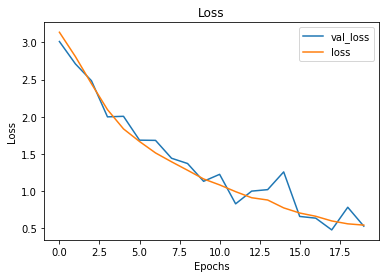

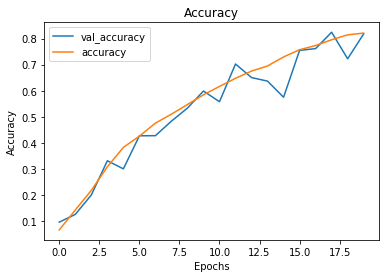

In [33]:
visualize_training_results(history)

In [34]:
results_test2 = model2.evaluate(imagestest, labelstt)

7172/7172 [==============================] - 0s 24us/step


In [35]:
results_test2

[1.372835211858893, 0.6264640092849731]

### Hypertuning

In [36]:
model3 = models.Sequential()
model3.add(layers.Dense(80, activation='relu', input_shape=(784,)))
model3.add(layers.Dense(40, activation='relu', kernel_regularizer=regularizers.l2(0.005),))
model3.add(layers.Dense(20, activation='relu'))
model3.add(layers.Dense(10, activation='relu'))
model3.add(layers.Dense(25, activation='softmax'))

model3.compile(optimizer ='sgd' ,loss='categorical_crossentropy',metrics=['accuracy'])

history3 = model3.fit(image_train,
                    label_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(image_val, label_val))

Train on 21964 samples, validate on 5491 samples
Epoch 1/20
21964/21964 [==============================] - 1s 65us/step - loss: 3.3808 - accuracy: 0.0724 - val_loss: 3.1790 - val_accuracy: 0.1229
Epoch 2/20
21964/21964 [==============================] - 1s 59us/step - loss: 2.8538 - accuracy: 0.1887 - val_loss: 2.4230 - val_accuracy: 0.2854
Epoch 3/20
21964/21964 [==============================] - 1s 59us/step - loss: 2.3347 - accuracy: 0.3120 - val_loss: 2.2748 - val_accuracy: 0.3243
Epoch 4/20
21964/21964 [==============================] - 1s 59us/step - loss: 2.0104 - accuracy: 0.4053 - val_loss: 1.7638 - val_accuracy: 0.4852
Epoch 5/20
21964/21964 [==============================] - 1s 63us/step - loss: 1.7939 - accuracy: 0.4661 - val_loss: 1.6216 - val_accuracy: 0.5148
Epoch 6/20
21964/21964 [==============================] - 1s 58us/step - loss: 1.6127 - accuracy: 0.5175 - val_loss: 3.2320 - val_accuracy: 0.2650
Epoch 7/20
21964/21964 [==============================] - 1s 59us/ste

In [37]:
results_test3 = model3.evaluate(imagestest, labelstt)

7172/7172 [==============================] - 0s 30us/step


In [38]:
results_test3

[1.2838756045481379, 0.6325989961624146]

# CNN

In [39]:
image_train  = np.array([np.reshape(i, (28, 28)) for i in image_train])
image_val  = np.array([np.reshape(i, (28, 28)) for i in image_val])
imagestest  = np.array([np.reshape(i, (28, 28)) for i in imagestest])

In [56]:
modelcnn = models.Sequential()
modelcnn.add(layers.Conv1D(64, (3), activation='relu',
                        input_shape=(28, 28)))
modelcnn.add(layers.MaxPooling1D((2)))

modelcnn.add(layers.Conv1D(128, (3), activation='relu'))
modelcnn.add(layers.MaxPooling1D((2)))

modelcnn.add(layers.Conv1D(256, (3), activation='relu'))
modelcnn.add(layers.MaxPooling1D((2)))

# modelcnn.add(layers.Conv1D(512, (3), activation='relu'))
# modelcnn.add(layers.MaxPooling1D((2)))

modelcnn.add(layers.Flatten())
modelcnn.add(layers.Dense(64, activation='relu'))
modelcnn.add(layers.Dropout(.1))

modelcnn.add(layers.Dense(25, activation='softmax'))

modelcnn.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])

In [ ]:
results = modelcnn.fit(image_train,
                      label_train,
                      epochs = 20,
                      batch_size=32,
                      validation_data=(image_val, label_val))

Train on 21964 samples, validate on 5491 samples
Epoch 1/20
21964/21964 [==============================] - 5s 206us/step - loss: 3.1499 - accuracy: 0.0990 - val_loss: 3.0355 - val_accuracy: 0.1246
Epoch 2/20
21964/21964 [==============================] - 5s 215us/step - loss: 2.6841 - accuracy: 0.2060 - val_loss: 2.2082 - val_accuracy: 0.3345
Epoch 3/20
21964/21964 [==============================] - 5s 206us/step - loss: 2.0392 - accuracy: 0.3498 - val_loss: 1.7680 - val_accuracy: 0.4498
Epoch 4/20
21964/21964 [==============================] - 4s 194us/step - loss: 1.6285 - accuracy: 0.4780 - val_loss: 1.3828 - val_accuracy: 0.5556
Epoch 5/20
21964/21964 [==============================] - 4s 196us/step - loss: 1.3044 - accuracy: 0.5695 - val_loss: 1.1582 - val_accuracy: 0.6154
Epoch 6/20
21964/21964 [==============================] - 4s 195us/step - loss: 1.0592 - accuracy: 0.6512 - val_loss: 0.8987 - val_accuracy: 0.7048
Epoch 7/20
21964/21964 [==============================] - 4s 19

In [ ]:
modelcnn.summary()

In [ ]:
visualize_training_results(results)

# Evaluating 

In [ ]:
results_testcnn = modelcnn.evaluate(imagestest, labelstt)

In [ ]:
results_testcnn